In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install gdown

In [4]:
!ls -lh /kaggle/working

total 2.9G
-rw-r--r-- 1 root root 296M Oct 18 08:57 test.rar
-rw-r--r-- 1 root root 2.3G Oct 18 09:57 train.rar
-rw-r--r-- 1 root root 295M Oct 18 10:57 valid.rar


In [5]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 72 not upgraded.
Need to get 145 kB of archives.
After this operation, 339 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 unrar amd64 1:6.1.5-1 [145 kB]
Fetched 145 kB in 0s (381 kB/s)
Selecting previously unselected package unrar.
(Reading database ... 122997 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a6.1.5-1_amd64.deb ...
Unpacking unrar (1:6.1.5-1) ...
Setting up unrar (1:6.1.5-1) ...
update-alternatives: using /usr/bin/unrar-nonfree to provide /usr/bin/unrar (unrar) in auto mode
update-alternatives: warning: skip creation of /usr/share/man/man1/unrar.1.gz because associated file /usr/share/man/man1/unrar-nonfree.1.gz (of link group unrar) doesn't exist
Processing triggers for man-db (2.10.2-1) ...

In [6]:
!mkdir /kaggle/working/new_extracted_files


In [7]:
!unrar x /kaggle/working/test.rar /kaggle/working/new_extracted_files
!unrar x /kaggle/working/train.rar /kaggle/working/new_extracted_files
!unrar x /kaggle/working/valid.rar /kaggle/working/new_extracted_files


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /kaggle/working/test.rar

Creating    /kaggle/working/new_extracted_files/test                  OK
Creating    /kaggle/working/new_extracted_files/test/CD               OK
Extracting  /kaggle/working/new_extracted_files/test/CD/ECG_CD172.png     0  OK 
Extracting  /kaggle/working/new_extracted_files/test/CD/ECG_CD173.png     0  OK 
Extracting  /kaggle/working/new_extracted_files/test/CD/ECG_CD174.png     0  OK 
Extracting  /kaggle/working/new_extracted_files/test/CD/ECG_CD175.png     0  OK 
Extracting  /kaggle/working/new_extracted_files/test/CD/ECG_CD176.png     0  OK 
Extracting  /kaggle/working/new_extracted_files/test/CD/ECG_CD177.png     0  OK 
Extracting  /kaggle/working/new_extracted_files/test/CD/ECG_CD178.png     0  OK 
Extracting  /kaggle/working/new_extracted_files/test/CD/ECG_CD179.png     0  OK 
Extracting  /kaggle/working/new_extracted_files/test/CD/ECG_CD180.png     0  OK 
Extract

In [8]:
!ls -lh /kaggle/working/new_extracted_files

total 12K
drwxr-xr-x 7 root root 4.0K Sep 22 09:28 test
drwxr-xr-x 7 root root 4.0K Sep 22 04:40 train
drwxr-xr-x 7 root root 4.0K Sep 22 09:28 valid


In [9]:
!ls -lh /kaggle/working/new_extracted_files/test

total 76K
drwxr-xr-x 2 root root  12K Sep 22 04:45 CD
drwxr-xr-x 2 root root 4.0K Sep 22 04:46 HYP
drwxr-xr-x 2 root root  12K Sep 22 09:28 MI
drwxr-xr-x 2 root root  36K Sep 22 04:38 NORM
drwxr-xr-x 2 root root  12K Sep 22 04:54 STTC


In [10]:
!ls -lh /kaggle/working/new_extracted_files/train

total 456K
drwxr-xr-x 2 root root  48K Sep 22 11:09 CD
drwxr-xr-x 2 root root  16K Sep 22 04:46 HYP
drwxr-xr-x 2 root root  68K Sep 22 09:29 MI
drwxr-xr-x 2 root root 256K Sep 22 04:40 NORM
drwxr-xr-x 2 root root  68K Sep 22 04:54 STTC


In [11]:
!ls -lh /kaggle/working/new_extracted_files/valid

total 68K
drwxr-xr-x 2 root root 4.0K Sep 22 04:44 CD
drwxr-xr-x 2 root root 4.0K Sep 22 04:46 HYP
drwxr-xr-x 2 root root  12K Sep 22 09:29 MI
drwxr-xr-x 2 root root  36K Sep 22 04:40 NORM
drwxr-xr-x 2 root root  12K Sep 22 04:48 STTC


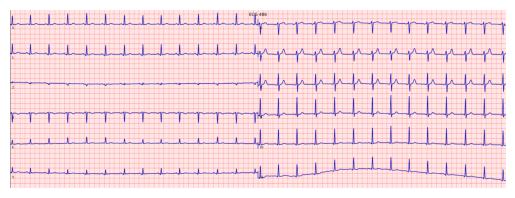

In [12]:
import os
from PIL import Image
import matplotlib.pyplot as plt

image_folder = '/kaggle/working/new_extracted_files/test/STTC/'


image_path = os.path.join(image_folder, 'ECG_STTC486.png')
img = Image.open(image_path)


plt.imshow(img)
plt.axis('off')  
plt.show()


In [13]:
test_data_path = '/kaggle/working/new_extracted_files/test'
train_data_path = '/kaggle/working/new_extracted_files/train'
valid_data_path = '/kaggle/working/new_extracted_files/valid'

In [15]:
from torchvision import transforms as T


test_transform = T.Compose([
    T.Resize((300, 300)),
    T.ToTensor(),
    T.Normalize(mean=(0.9610, 0.8270, 0.8528), std=(0.1164, 0.1174, 0.0648))
])


train_transform = T.Compose([
    T.Resize((300, 300)),  
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(0.2),
    T.ColorJitter(brightness=0.1, contrast= 0.2, saturation= 0.1, hue= 0.1),
    T.ToTensor(),  
    T.Normalize(mean=(0.9610, 0.8270, 0.8528), std=(0.1164, 0.1174, 0.0648))  #
])


valid_transform = T.Compose([
    T.Resize((300, 300)), 
    T.RandomRotation(0.1),
    T.ToTensor(),   
    T.Normalize(mean=(0.9610, 0.8270, 0.8528), std=(0.1164, 0.1174, 0.0648))  # 
    
])

In [16]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


test_data = ImageFolder(test_data_path, transform=test_transform)

valid_data = ImageFolder(valid_data_path, transform=valid_transform)

train_data = ImageFolder(train_data_path, transform=train_transform)


test_loader = DataLoader(test_data, batch_size=128, shuffle=False)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=128, shuffle=False)

In [17]:
import torch
Device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(Device)

cuda


In [18]:
import torch
import torchvision

from torch.utils.data import DataLoader
import timm
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models


In [19]:


#  SE Block
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.fc1 = nn.Linear(channel, channel // reduction)
        self.fc2 = nn.Linear(channel // reduction, channel)

    def forward(self, x):
        batch, channels, _, _ = x.size()
        se = nn.functional.adaptive_avg_pool2d(x, 1).view(batch, channels)
        se = nn.ReLU()(self.fc1(se))
        se = torch.sigmoid(self.fc2(se)).view(batch, channels, 1, 1)
        return x * se

#   ResNet18
model = models.resnet18(pretrained=True)

for name, param in model.named_parameters():
    if  "layer4"  in name or "layer3"  in name:
        param.requires_grad = False  # frozen layer3، layer4
    else:
        param.requires_grad = True   # trainable (layer1,2 و head)

# SE Block + (layer4,3)
model.layer4.add_module("se_block", SEBlock(channel=512, reduction=16))
model.layer3.add_module("se_block", SEBlock(channel=256, reduction=16))
#  FC + Dropout 
num_classes = 5
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),  #
    nn.Linear(model.fc.in_features, num_classes)
)

model = model.to(Device)


for name, param in model.named_parameters():
    status = "Trainable" if param.requires_grad else "Frozen"
    print(f"{name}: {status}")

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 81.2MB/s]


conv1.weight: Trainable
bn1.weight: Trainable
bn1.bias: Trainable
layer1.0.conv1.weight: Trainable
layer1.0.bn1.weight: Trainable
layer1.0.bn1.bias: Trainable
layer1.0.conv2.weight: Trainable
layer1.0.bn2.weight: Trainable
layer1.0.bn2.bias: Trainable
layer1.1.conv1.weight: Trainable
layer1.1.bn1.weight: Trainable
layer1.1.bn1.bias: Trainable
layer1.1.conv2.weight: Trainable
layer1.1.bn2.weight: Trainable
layer1.1.bn2.bias: Trainable
layer2.0.conv1.weight: Trainable
layer2.0.bn1.weight: Trainable
layer2.0.bn1.bias: Trainable
layer2.0.conv2.weight: Trainable
layer2.0.bn2.weight: Trainable
layer2.0.bn2.bias: Trainable
layer2.0.downsample.0.weight: Trainable
layer2.0.downsample.1.weight: Trainable
layer2.0.downsample.1.bias: Trainable
layer2.1.conv1.weight: Trainable
layer2.1.bn1.weight: Trainable
layer2.1.bn1.bias: Trainable
layer2.1.conv2.weight: Trainable
layer2.1.bn2.weight: Trainable
layer2.1.bn2.bias: Trainable
layer3.0.conv1.weight: Frozen
layer3.0.bn1.weight: Frozen
layer3.0.bn1.b

In [20]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
# total param
total_params = sum(p.numel() for p in model.parameters())
print(f'Total parameters: {total_params}')

#  trainabel param
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Trainable parameters: {trainable_params}')

Total parameters: 11220853
Trainable parameters: 727413


In [22]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [23]:
model1= model.to(device)

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchmetrics import Accuracy
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import pickle


Device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.empty_cache()


def save_epoch_metrics(metrics, file_name='epoch_metrics.pkl'):
    with open(file_name, 'wb') as f:
        pickle.dump(metrics, f)

#loss
class AverageMeter:
    def __init__(self):
        self.reset()

    def reset(self):
        self.val, self.avg, self.sum, self.count = 0, 0, 0, 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

# train model

def train(model, train_loader, loss_fn, optimizer, epoch=None):
    model.train()
    loss_train = AverageMeter()
    acc_train = Accuracy(task="multiclass", num_classes=5).to(Device)

    with tqdm(train_loader, unit="batch") as tepoch:
        for inputs, targets in tepoch:
            if epoch is not None:
                tepoch.set_description(f"Epoch {epoch}")

            # Move data to device
            inputs, targets = inputs.to(Device), targets.to(Device)

            # Forward pass
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)

            # Backpropagation
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
            optimizer.step()
            optimizer.zero_grad()

            # Update metrics
            loss_train.update(loss.item(), n=inputs.size(0))
            acc_train.update(outputs, targets.int())
            tepoch.set_postfix(
                loss=loss_train.avg,
                accuracy=100.0 * acc_train.compute().item()
            )

    return model, loss_train.avg, acc_train.compute().item()


def validate(model, loader, loss_fn):
    model.eval()
    loss_valid, acc_valid = AverageMeter(), Accuracy(task="multiclass", num_classes=5).to(Device)
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(Device), targets.to(Device)
            outputs = model(inputs)
            loss_valid.update(loss_fn(outputs, targets).item(), inputs.size(0))
            acc_valid(outputs, targets.int())
    return loss_valid.avg, acc_valid.compute().item()


model = model.to(Device)
lr, wd, num_epochs, best_loss_valid2 = 0.1, 1e-5, 45, torch.inf
loss_fn = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=wd)




epoch_metrics = {'epoch': [], 'train_loss': [], 'train_acc': [], 'valid_loss': [], 'valid_acc': []}

import time  


start_time = time.time()


for epoch in range(num_epochs):
    model, loss_train, acc_train = train(model1, train_loader, loss_fn, optimizer2, epoch)
    print(f'Epoch {epoch}: Train Loss = {loss_train:.4f}, Train Acc = {acc_train:.4f}')
    loss_valid, acc_valid = validate(model1, valid_loader, loss_fn)

    
    epoch_metrics['epoch'].append(epoch)
    epoch_metrics['train_loss'].append(loss_train)
    epoch_metrics['train_acc'].append(acc_train)
    epoch_metrics['valid_loss'].append(loss_valid)
    epoch_metrics['valid_acc'].append(acc_valid)
    save_epoch_metrics(epoch_metrics)


    if loss_valid < best_loss_valid2:
        torch.save({
            'model_state_dict': model.state_dict(),  
            'model': model,  
            'optimizer_state_dict': optimizer2.state_dict(),  
            'epoch': epoch,  
            'loss': loss_valid 
        }, 'resnetsenet34.pth')   
        best_loss_valid2 = loss_valid

    print(f'Epoch {epoch}: Valid Loss = {loss_valid:.4f}, Valid Acc = {acc_valid:.4f}')


end_time = time.time()


elapsed_time = end_time - start_time
print(f"Training completed in {elapsed_time // 3600:.0f}h {elapsed_time % 3600 // 60:.0f}m {elapsed_time % 60:.0f}s")



Epoch 0: 100%|██████████| 102/102 [06:05<00:00,  3.58s/batch, accuracy=56.2, loss=1.17]


Epoch 0: Train Loss = 1.1741, Train Acc = 0.5619
Epoch 0: Valid Loss = 1.0357, Valid Acc = 0.6127


Epoch 1: 100%|██████████| 102/102 [06:00<00:00,  3.54s/batch, accuracy=64.7, loss=0.964]


Epoch 1: Train Loss = 0.9644, Train Acc = 0.6470
Epoch 1: Valid Loss = 0.8959, Valid Acc = 0.6695


Epoch 2: 100%|██████████| 102/102 [06:00<00:00,  3.54s/batch, accuracy=68.9, loss=0.857]


Epoch 2: Train Loss = 0.8569, Train Acc = 0.6887
Epoch 2: Valid Loss = 0.8287, Valid Acc = 0.6940


Epoch 3: 100%|██████████| 102/102 [06:00<00:00,  3.53s/batch, accuracy=71.1, loss=0.803]


Epoch 3: Train Loss = 0.8031, Train Acc = 0.7109
Epoch 3: Valid Loss = 0.8332, Valid Acc = 0.6817


Epoch 4: 100%|██████████| 102/102 [06:02<00:00,  3.55s/batch, accuracy=72.6, loss=0.765]


Epoch 4: Train Loss = 0.7651, Train Acc = 0.7258
Epoch 4: Valid Loss = 0.7718, Valid Acc = 0.7147


Epoch 5: 100%|██████████| 102/102 [06:09<00:00,  3.62s/batch, accuracy=73.6, loss=0.733]


Epoch 5: Train Loss = 0.7328, Train Acc = 0.7364
Epoch 5: Valid Loss = 0.7337, Valid Acc = 0.7343


Epoch 6: 100%|██████████| 102/102 [06:15<00:00,  3.68s/batch, accuracy=74.7, loss=0.714]


Epoch 6: Train Loss = 0.7145, Train Acc = 0.7468
Epoch 6: Valid Loss = 0.7195, Valid Acc = 0.7447


Epoch 7: 100%|██████████| 102/102 [06:16<00:00,  3.69s/batch, accuracy=74.8, loss=0.691]


Epoch 7: Train Loss = 0.6907, Train Acc = 0.7479
Epoch 7: Valid Loss = 0.8017, Valid Acc = 0.7111


Epoch 8: 100%|██████████| 102/102 [06:15<00:00,  3.68s/batch, accuracy=75.6, loss=0.673]


Epoch 8: Train Loss = 0.6730, Train Acc = 0.7559
Epoch 8: Valid Loss = 0.6934, Valid Acc = 0.7514


Epoch 9: 100%|██████████| 102/102 [06:14<00:00,  3.68s/batch, accuracy=76.4, loss=0.653]


Epoch 9: Train Loss = 0.6532, Train Acc = 0.7635
Epoch 9: Valid Loss = 0.6917, Valid Acc = 0.7434


Epoch 10: 100%|██████████| 102/102 [06:16<00:00,  3.69s/batch, accuracy=76.8, loss=0.639]


Epoch 10: Train Loss = 0.6389, Train Acc = 0.7677
Epoch 10: Valid Loss = 0.6677, Valid Acc = 0.7526


Epoch 11: 100%|██████████| 102/102 [06:01<00:00,  3.54s/batch, accuracy=78.3, loss=0.615]


Epoch 11: Train Loss = 0.6149, Train Acc = 0.7830
Epoch 11: Valid Loss = 0.6080, Valid Acc = 0.7746


Epoch 12: 100%|██████████| 102/102 [05:58<00:00,  3.52s/batch, accuracy=78.4, loss=0.601]


Epoch 12: Train Loss = 0.6015, Train Acc = 0.7837
Epoch 12: Valid Loss = 0.5862, Valid Acc = 0.7740


Epoch 13: 100%|██████████| 102/102 [06:04<00:00,  3.57s/batch, accuracy=79.1, loss=0.587]


Epoch 13: Train Loss = 0.5871, Train Acc = 0.7914
Epoch 13: Valid Loss = 0.6179, Valid Acc = 0.7685


Epoch 14: 100%|██████████| 102/102 [06:03<00:00,  3.57s/batch, accuracy=79.4, loss=0.569]


Epoch 14: Train Loss = 0.5689, Train Acc = 0.7942
Epoch 14: Valid Loss = 0.5376, Valid Acc = 0.7935


Epoch 15: 100%|██████████| 102/102 [06:04<00:00,  3.57s/batch, accuracy=80.2, loss=0.557]


Epoch 15: Train Loss = 0.5569, Train Acc = 0.8017
Epoch 15: Valid Loss = 0.5309, Valid Acc = 0.8070


Epoch 16: 100%|██████████| 102/102 [06:06<00:00,  3.59s/batch, accuracy=80.4, loss=0.546]


Epoch 16: Train Loss = 0.5464, Train Acc = 0.8039
Epoch 16: Valid Loss = 0.4766, Valid Acc = 0.8204


Epoch 17: 100%|██████████| 102/102 [06:06<00:00,  3.59s/batch, accuracy=81.3, loss=0.52] 


Epoch 17: Train Loss = 0.5197, Train Acc = 0.8133
Epoch 17: Valid Loss = 0.4710, Valid Acc = 0.8161


Epoch 18: 100%|██████████| 102/102 [06:02<00:00,  3.55s/batch, accuracy=82.1, loss=0.506]


Epoch 18: Train Loss = 0.5059, Train Acc = 0.8206
Epoch 18: Valid Loss = 0.4790, Valid Acc = 0.8180


Epoch 19: 100%|██████████| 102/102 [06:03<00:00,  3.57s/batch, accuracy=82.7, loss=0.486]


Epoch 19: Train Loss = 0.4857, Train Acc = 0.8274
Epoch 19: Valid Loss = 0.4334, Valid Acc = 0.8338


Epoch 20: 100%|██████████| 102/102 [05:59<00:00,  3.52s/batch, accuracy=83.1, loss=0.469]


Epoch 20: Train Loss = 0.4690, Train Acc = 0.8309
Epoch 20: Valid Loss = 0.4343, Valid Acc = 0.8381


Epoch 21: 100%|██████████| 102/102 [06:00<00:00,  3.54s/batch, accuracy=84, loss=0.454] 


Epoch 21: Train Loss = 0.4538, Train Acc = 0.8402
Epoch 21: Valid Loss = 0.7577, Valid Acc = 0.7221


Epoch 22: 100%|██████████| 102/102 [05:59<00:00,  3.53s/batch, accuracy=84.3, loss=0.44] 


Epoch 22: Train Loss = 0.4402, Train Acc = 0.8426
Epoch 22: Valid Loss = 0.4522, Valid Acc = 0.8320


Epoch 23: 100%|██████████| 102/102 [06:01<00:00,  3.55s/batch, accuracy=84.3, loss=0.431]


Epoch 23: Train Loss = 0.4308, Train Acc = 0.8433
Epoch 23: Valid Loss = 0.4541, Valid Acc = 0.8216


Epoch 24: 100%|██████████| 102/102 [05:59<00:00,  3.53s/batch, accuracy=85.4, loss=0.413]


Epoch 24: Train Loss = 0.4131, Train Acc = 0.8541
Epoch 24: Valid Loss = 0.4046, Valid Acc = 0.8442


Epoch 25: 100%|██████████| 102/102 [06:01<00:00,  3.54s/batch, accuracy=85.6, loss=0.4]  


Epoch 25: Train Loss = 0.3998, Train Acc = 0.8564
Epoch 25: Valid Loss = 0.3642, Valid Acc = 0.8693


Epoch 26: 100%|██████████| 102/102 [06:02<00:00,  3.55s/batch, accuracy=86.1, loss=0.389]


Epoch 26: Train Loss = 0.3887, Train Acc = 0.8611
Epoch 26: Valid Loss = 0.4607, Valid Acc = 0.8198


Epoch 27: 100%|██████████| 102/102 [06:00<00:00,  3.53s/batch, accuracy=86.2, loss=0.379]


Epoch 27: Train Loss = 0.3790, Train Acc = 0.8624
Epoch 27: Valid Loss = 0.4463, Valid Acc = 0.8326


Epoch 28: 100%|██████████| 102/102 [06:00<00:00,  3.54s/batch, accuracy=86.2, loss=0.383]


Epoch 28: Train Loss = 0.3832, Train Acc = 0.8622
Epoch 28: Valid Loss = 0.3814, Valid Acc = 0.8540


Epoch 29: 100%|██████████| 102/102 [06:02<00:00,  3.55s/batch, accuracy=86.9, loss=0.369]


Epoch 29: Train Loss = 0.3692, Train Acc = 0.8686
Epoch 29: Valid Loss = 0.3946, Valid Acc = 0.8552


Epoch 30: 100%|██████████| 102/102 [06:03<00:00,  3.56s/batch, accuracy=86.8, loss=0.361]


Epoch 30: Train Loss = 0.3607, Train Acc = 0.8677
Epoch 30: Valid Loss = 0.3953, Valid Acc = 0.8479


Epoch 31: 100%|██████████| 102/102 [06:05<00:00,  3.58s/batch, accuracy=87.6, loss=0.344]


Epoch 31: Train Loss = 0.3440, Train Acc = 0.8760
Epoch 31: Valid Loss = 0.3789, Valid Acc = 0.8571


Epoch 32: 100%|██████████| 102/102 [06:02<00:00,  3.55s/batch, accuracy=88, loss=0.339] 


Epoch 32: Train Loss = 0.3390, Train Acc = 0.8798
Epoch 32: Valid Loss = 0.3721, Valid Acc = 0.8607


Epoch 33: 100%|██████████| 102/102 [06:02<00:00,  3.55s/batch, accuracy=87.9, loss=0.334]


Epoch 33: Train Loss = 0.3341, Train Acc = 0.8791
Epoch 33: Valid Loss = 0.4221, Valid Acc = 0.8393


Epoch 34: 100%|██████████| 102/102 [06:02<00:00,  3.55s/batch, accuracy=88.2, loss=0.334]


Epoch 34: Train Loss = 0.3339, Train Acc = 0.8818
Epoch 34: Valid Loss = 0.4957, Valid Acc = 0.8186


Epoch 35: 100%|██████████| 102/102 [06:00<00:00,  3.53s/batch, accuracy=88.6, loss=0.324]


Epoch 35: Train Loss = 0.3243, Train Acc = 0.8855
Epoch 35: Valid Loss = 0.4561, Valid Acc = 0.8253


Epoch 36: 100%|██████████| 102/102 [06:00<00:00,  3.54s/batch, accuracy=89.1, loss=0.312]


Epoch 36: Train Loss = 0.3122, Train Acc = 0.8906
Epoch 36: Valid Loss = 0.3475, Valid Acc = 0.8742


Epoch 37: 100%|██████████| 102/102 [06:04<00:00,  3.57s/batch, accuracy=89, loss=0.312]  


Epoch 37: Train Loss = 0.3120, Train Acc = 0.8896
Epoch 37: Valid Loss = 0.4054, Valid Acc = 0.8516


Epoch 38: 100%|██████████| 102/102 [06:01<00:00,  3.54s/batch, accuracy=89.5, loss=0.297]


Epoch 38: Train Loss = 0.2971, Train Acc = 0.8954
Epoch 38: Valid Loss = 0.4060, Valid Acc = 0.8461


Epoch 39: 100%|██████████| 102/102 [06:05<00:00,  3.59s/batch, accuracy=89.7, loss=0.288]


Epoch 39: Train Loss = 0.2884, Train Acc = 0.8968
Epoch 39: Valid Loss = 0.3974, Valid Acc = 0.8638


Epoch 40: 100%|██████████| 102/102 [06:04<00:00,  3.58s/batch, accuracy=89.8, loss=0.288]


Epoch 40: Train Loss = 0.2877, Train Acc = 0.8984
Epoch 40: Valid Loss = 0.3560, Valid Acc = 0.8711


Epoch 41: 100%|██████████| 102/102 [06:04<00:00,  3.57s/batch, accuracy=90, loss=0.281] 


Epoch 41: Train Loss = 0.2815, Train Acc = 0.9001
Epoch 41: Valid Loss = 0.4892, Valid Acc = 0.8167


Epoch 42: 100%|██████████| 102/102 [06:04<00:00,  3.58s/batch, accuracy=90.6, loss=0.27]


Epoch 42: Train Loss = 0.2697, Train Acc = 0.9056
Epoch 42: Valid Loss = 0.3515, Valid Acc = 0.8711


Epoch 43: 100%|██████████| 102/102 [06:03<00:00,  3.56s/batch, accuracy=90.5, loss=0.269]


Epoch 43: Train Loss = 0.2692, Train Acc = 0.9051
Epoch 43: Valid Loss = 0.4726, Valid Acc = 0.8332


Epoch 44: 100%|██████████| 102/102 [06:05<00:00,  3.59s/batch, accuracy=90.9, loss=0.253]


Epoch 44: Train Loss = 0.2534, Train Acc = 0.9090
Epoch 44: Valid Loss = 0.4151, Valid Acc = 0.8540
Training completed in 4h 54m 12s


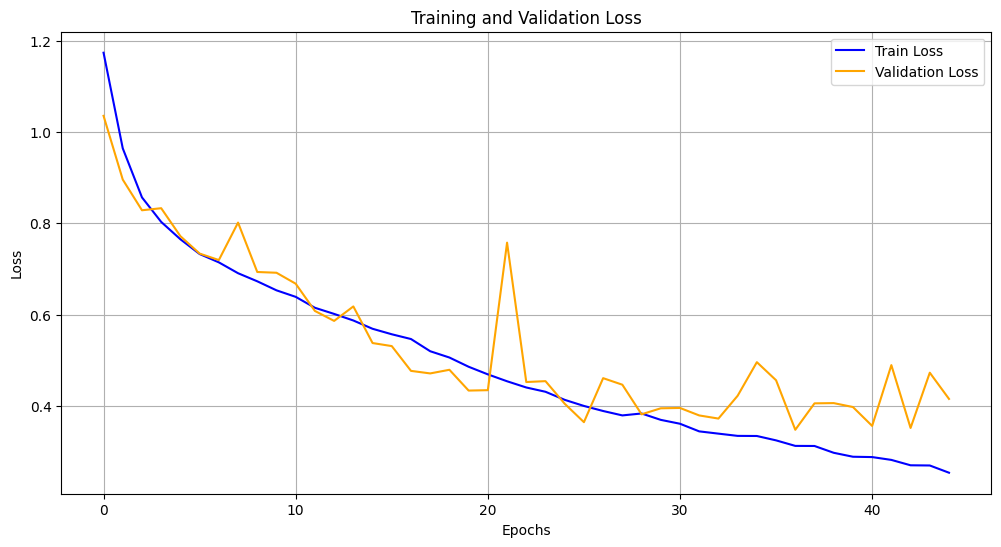

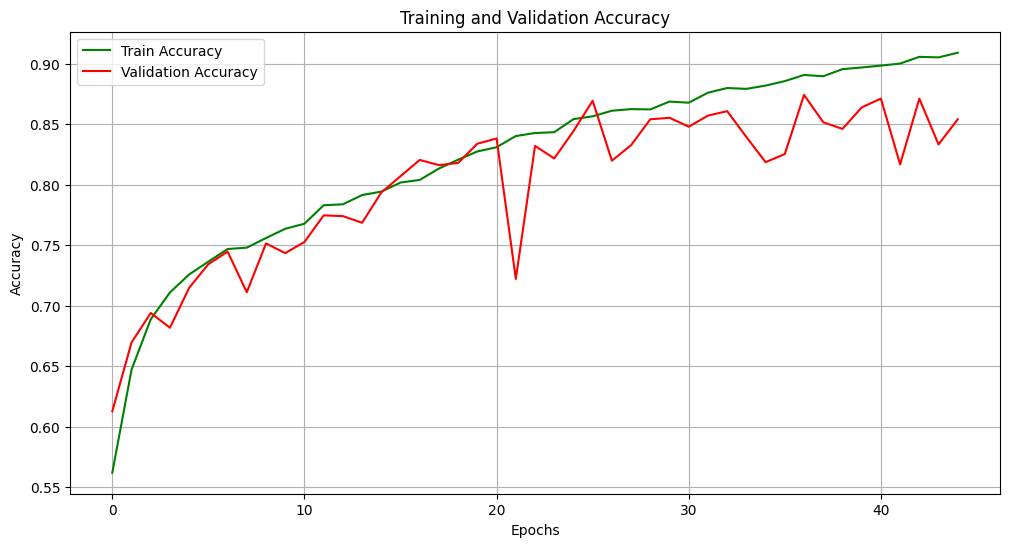

In [25]:
#  Loss , Accuracy

# Loss 
plt.figure(figsize=(12, 6))
plt.plot(epoch_metrics['epoch'], epoch_metrics['train_loss'], label='Train Loss', color='blue')
plt.plot(epoch_metrics['epoch'], epoch_metrics['valid_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epoch_metrics['epoch'], epoch_metrics['train_acc'], label='Train Accuracy', color='green')
plt.plot(epoch_metrics['epoch'], epoch_metrics['valid_acc'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

          CD       0.86      0.78      0.82       184
         HYP       0.63      0.39      0.48        56
          MI       0.86      0.56      0.68       256
        NORM       0.87      1.00      0.93       912
        STTC       0.73      0.72      0.72       242

    accuracy                           0.84      1650
   macro avg       0.79      0.69      0.73      1650
weighted avg       0.84      0.84      0.83      1650

Accuracy: 84.42%


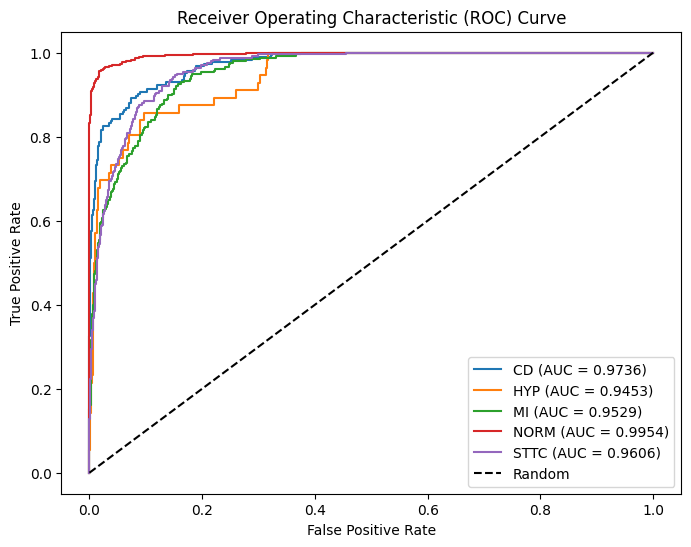

In [26]:
import torch.nn.functional as F
from torchmetrics import Accuracy
from sklearn.metrics import classification_report
import torch

#test
def test_model(model, test_loader, device):
    model.eval()
    acc_test = Accuracy(task="multiclass", num_classes=5).to(device)
    y_true = []
    y_pred = []
    y_scores = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(Device)
            targets = targets.to(Device)
            outputs = model(inputs)
            
        
            predicted_labels = torch.argmax(outputs, dim=1)
            y_pred.extend(predicted_labels.cpu().numpy())
            y_true.extend(targets.cpu().numpy())
            y_scores.extend(F.softmax(outputs, dim=1).cpu().numpy())

     
            acc_test.update(outputs, targets.int())
    
    
    print(classification_report(y_true, y_pred, target_names=test_data.classes))
    print(f"Accuracy: {acc_test.compute().item() * 100:.2f}%")



model1 = model1.to(Device)


test_model(model1, test_loader, Device)

##############
##############ROC########################

from sklearn.metrics import roc_curve, auc
class_names = ["CD", "HYP", "MI", "NORM", "STTC"]

def plot_roc(model, test_loader, class_names):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(Device)
            targets = targets.to(Device)

            outputs = model(inputs)
            y_true.extend(targets.cpu().numpy())
            y_scores.extend(F.softmax(outputs, dim=1).cpu().numpy())

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve((np.array(y_true) == i).astype(int), np.array(y_scores)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


# 
plot_roc(model1, test_loader, class_names)


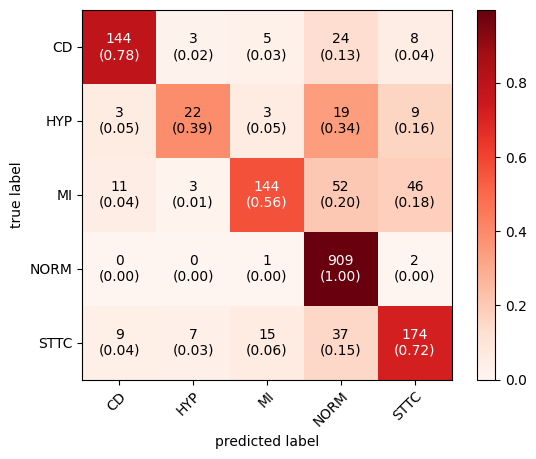

              precision    recall  f1-score   support

          CD       0.86      0.78      0.82       184
         HYP       0.63      0.39      0.48        56
          MI       0.86      0.56      0.68       256
        NORM       0.87      1.00      0.93       912
        STTC       0.73      0.72      0.72       242

    accuracy                           0.84      1650
   macro avg       0.79      0.69      0.73      1650
weighted avg       0.84      0.84      0.83      1650



In [28]:
##############

from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
NUM_CLASS = ["CD", "HYP", "MI", "NORM", "STTC"]

def plot_cm2(model, test_loader, class_names, normalize='true'):
    # plot the confusion matrix
    model.eval()
    y_pred = []
    y_true = []
    for i, (inputs, targets) in enumerate(test_loader):
        inputs = inputs.to(Device)
        targets = targets.to(Device)
        outputs = model(inputs)
        predicted_labels = torch.argmax(outputs, dim=1)
        #true_labels = torch.argmax(targets, dim=1)
        y_pred.extend(predicted_labels.cpu().numpy())
        y_true.extend(targets.cpu().numpy())

    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    cm_display = plot_confusion_matrix(conf_mat=confusion_matrix, show_absolute= "True",show_normed = "True",cmap= "Reds", colorbar = "True", class_names=class_names)
    plt.show()
    print(classification_report(y_true, y_pred, target_names=class_names))

# plot the confusion matrix using the validation set
plot_cm2(model1, test_loader, NUM_CLASS)

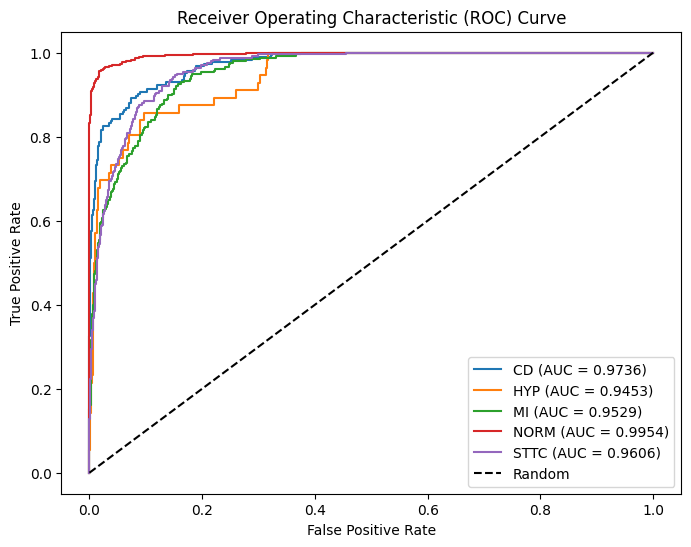

Class CD - Sensitivity: 0.7826, Specificity: 0.9843, Precision: 0.8623, Recall: 0.7826, F1-score: 0.8205
Class HYP - Sensitivity: 0.3929, Specificity: 0.9918, Precision: 0.6286, Recall: 0.3929, F1-score: 0.4835
Class MI - Sensitivity: 0.5625, Specificity: 0.9828, Precision: 0.8571, Recall: 0.5625, F1-score: 0.6792
Class NORM - Sensitivity: 0.9967, Specificity: 0.8211, Precision: 0.8732, Recall: 0.9967, F1-score: 0.9309
Class STTC - Sensitivity: 0.7190, Specificity: 0.9538, Precision: 0.7280, Recall: 0.7190, F1-score: 0.7235


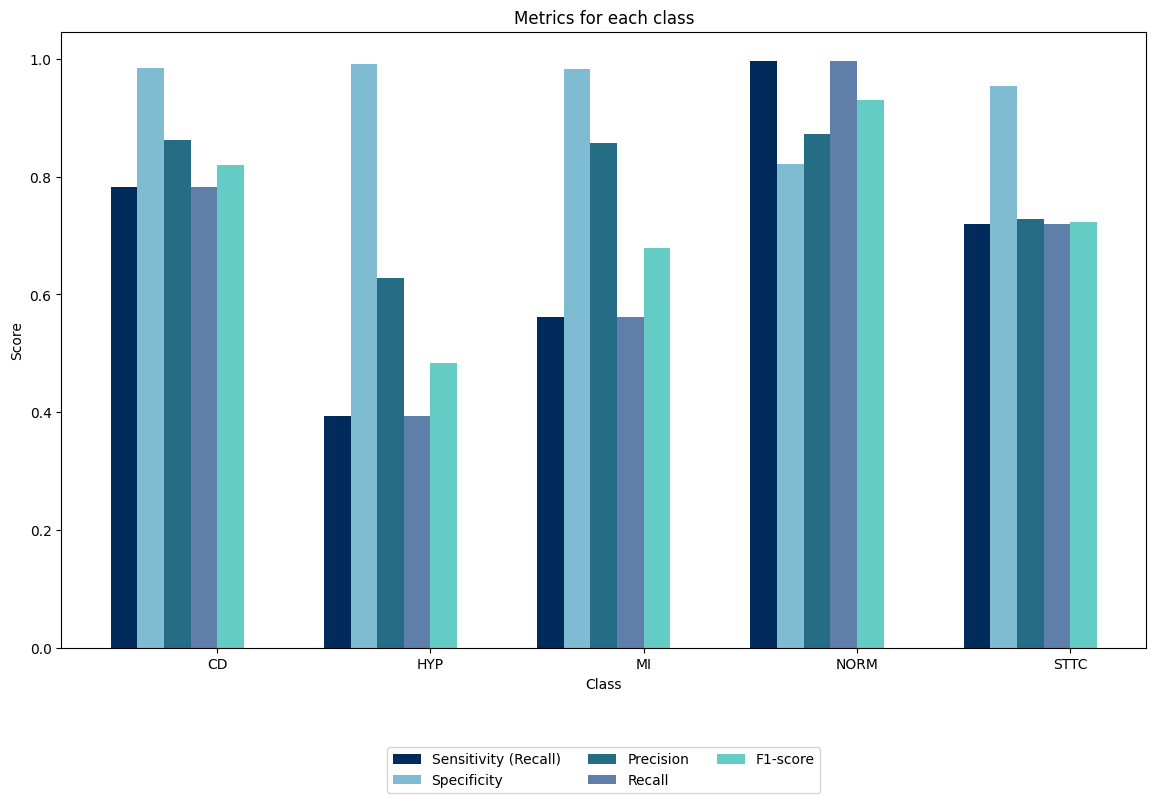

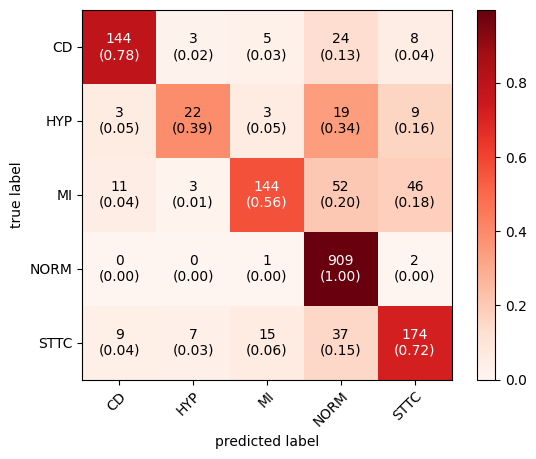

              precision    recall  f1-score   support

          CD       0.86      0.78      0.82       184
         HYP       0.63      0.39      0.48        56
          MI       0.86      0.56      0.68       256
        NORM       0.87      1.00      0.93       912
        STTC       0.73      0.72      0.72       242

    accuracy                           0.84      1650
   macro avg       0.79      0.69      0.73      1650
weighted avg       0.84      0.84      0.83      1650



In [29]:
####################################
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
NUM_CLASS = ["CD", "HYP", "MI", "NORM", "STTC"]

##############ROC########################

from sklearn.metrics import roc_curve, auc

def plot_roc(model, test_loader, class_names):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model1(inputs)
            y_true.extend(targets.cpu().numpy())
            y_scores.extend(F.softmax(outputs, dim=1).cpu().numpy())

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve((np.array(y_true) == i).astype(int), np.array(y_scores)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#  ROC
plot_roc(model1, test_loader, NUM_CLASS)
#############
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, average_precision_score

###################
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

class_names = ["CD", "HYP", "MI", "NORM", "STTC"]

def plot_cm(model, test_loader, device):
    # Plot the confusion matrix
    model.eval()
    y_pred = []
    y_true = []
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)

        output = model1(x)

        y_pred.extend(torch.argmax(output, dim=1).cpu().numpy())
        y_true.extend(y.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)

    n_classes = len(class_names)

    sensitivities = []
    specificities = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracies = []

    # Calculate metrics for each class
    for i in range(n_classes):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fn + fp)
        
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        
        sensitivities.append(sensitivity)
        specificities.append(specificity)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
 
        
        # Print the metrics for each class
        print(f"Class {class_names[i]} - Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Prepare data for grouped bar chart
    bar_width = 0.125
    x = np.arange(n_classes)
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot each metric
    ax.bar(x - 2 * bar_width, sensitivities, width=bar_width, label='Sensitivity (Recall)', color='#002B5B')
    ax.bar(x - bar_width, specificities, width=bar_width, label='Specificity', color='#7FBCD2')
    ax.bar(x, precisions, width=bar_width, label='Precision', color='#256D85')
    ax.bar(x + bar_width, recalls, width=bar_width, label='Recall', color='#607EAA')
    ax.bar(x + 2 * bar_width, f1_scores, width=bar_width, label='F1-score', color='#64CCC5')
    
    
    # Labeling
    ax.set_xlabel('Class')
    ax.set_ylabel('Score')
    ax.set_title('Metrics for each class')
    ax.set_xticks(x + bar_width * 1.5)
    ax.set_xticklabels(class_names)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

    plt.show()

# Ensure 'device' is defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example usage (assuming 'model' and 'test_loader' are defined):

plot_cm(model1, test_loader, device)

###########
##############

from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
NUM_CLASS = ["CD", "HYP", "MI", "NORM", "STTC"]

def plot_cm2(model, test_loader, class_names, normalize='true'):
    # plot the confusion matrix
    model.eval()
    y_pred = []
    y_true = []
    for i, (inputs, targets) in enumerate(test_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model1(inputs)
        predicted_labels = torch.argmax(outputs, dim=1)
        #true_labels = torch.argmax(targets, dim=1)
        y_pred.extend(predicted_labels.cpu().numpy())
        y_true.extend(targets.cpu().numpy())

    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    cm_display = plot_confusion_matrix(conf_mat=confusion_matrix, show_absolute= "True",show_normed = "True",cmap= "Reds", colorbar = "True", class_names=class_names)
    plt.show()
    print(classification_report(y_true, y_pred, target_names=class_names))

# plot the confusion matrix using the validation set
plot_cm2(model1, test_loader, NUM_CLASS)

    

In [31]:
checkpoint = torch.load('/kaggle/working/resnetsenet34.pth')  # load model
model2 = checkpoint['model']  
model2.load_state_dict(checkpoint['model_state_dict'])  


optimizer2.load_state_dict(checkpoint['optimizer_state_dict'])

epoch = checkpoint['epoch']
loss_valid = checkpoint['loss']


/tmp/ipykernel_23/630071761.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/kaggle/working/resnetsenet34.pth')  # بارگذاری فایل ذخیره


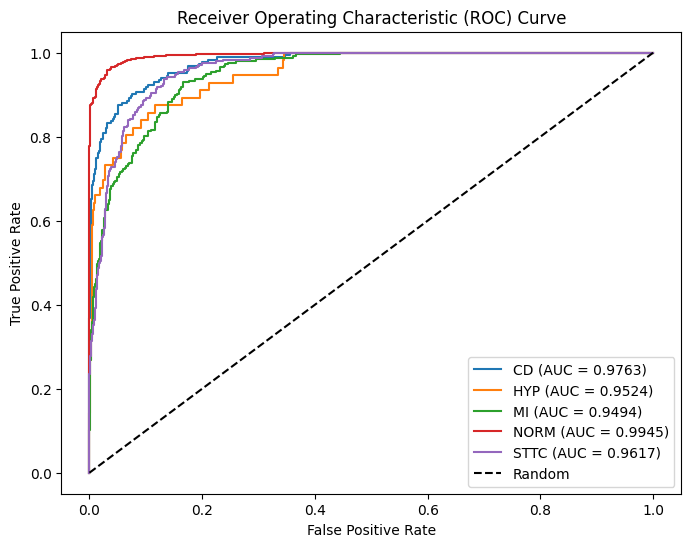

Class CD - Sensitivity: 0.7228, Specificity: 0.9884, Precision: 0.8867, Recall: 0.7228, F1-score: 0.7964
Class HYP - Sensitivity: 0.5357, Specificity: 0.9925, Precision: 0.7143, Recall: 0.5357, F1-score: 0.6122
Class MI - Sensitivity: 0.6016, Specificity: 0.9727, Precision: 0.8021, Recall: 0.6016, F1-score: 0.6875
Class NORM - Sensitivity: 0.9923, Specificity: 0.8550, Precision: 0.8943, Recall: 0.9923, F1-score: 0.9407
Class STTC - Sensitivity: 0.7645, Specificity: 0.9510, Precision: 0.7283, Recall: 0.7645, F1-score: 0.7460


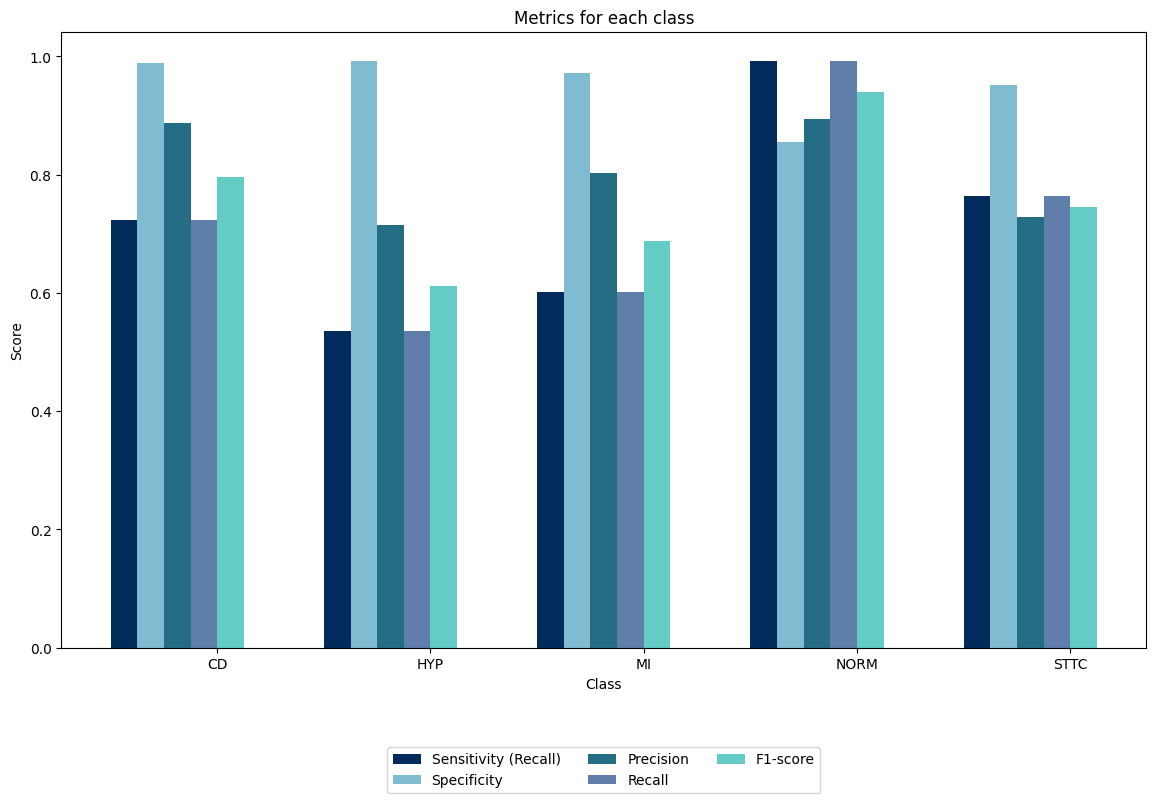

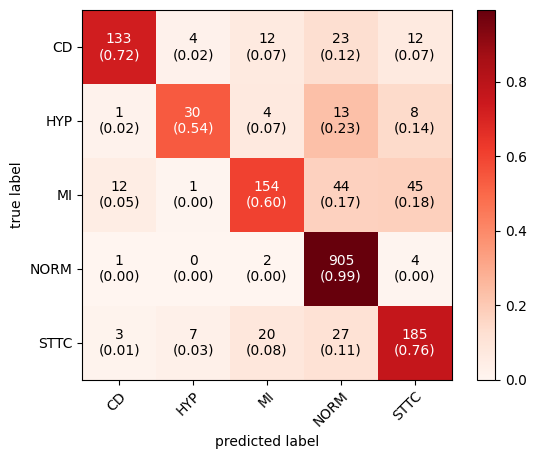

              precision    recall  f1-score   support

          CD       0.89      0.72      0.80       184
         HYP       0.71      0.54      0.61        56
          MI       0.80      0.60      0.69       256
        NORM       0.89      0.99      0.94       912
        STTC       0.73      0.76      0.75       242

    accuracy                           0.85      1650
   macro avg       0.81      0.72      0.76      1650
weighted avg       0.85      0.85      0.85      1650



In [32]:
####################################
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
NUM_CLASS = ["CD", "HYP", "MI", "NORM", "STTC"]

##############ROC########################

from sklearn.metrics import roc_curve, auc

def plot_roc(model, test_loader, class_names):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model2(inputs)
            y_true.extend(targets.cpu().numpy())
            y_scores.extend(F.softmax(outputs, dim=1).cpu().numpy())

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve((np.array(y_true) == i).astype(int), np.array(y_scores)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# ROC
plot_roc(model2, test_loader, NUM_CLASS)
#############
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, average_precision_score

###################
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

class_names = ["CD", "HYP", "MI", "NORM", "STTC"]

def plot_cm(model, test_loader, device):
    # Plot the confusion matrix
    model.eval()
    y_pred = []
    y_true = []
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)

        output = model2(x)

        y_pred.extend(torch.argmax(output, dim=1).cpu().numpy())
        y_true.extend(y.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)

    n_classes = len(class_names)

    sensitivities = []
    specificities = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracies = []

    # Calculate metrics for each class
    for i in range(n_classes):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fn + fp)
        
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        
        sensitivities.append(sensitivity)
        specificities.append(specificity)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
 
        
        # Print the metrics for each class
        print(f"Class {class_names[i]} - Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Prepare data for grouped bar chart
    bar_width = 0.125
    x = np.arange(n_classes)
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot each metric
    ax.bar(x - 2 * bar_width, sensitivities, width=bar_width, label='Sensitivity (Recall)', color='#002B5B')
    ax.bar(x - bar_width, specificities, width=bar_width, label='Specificity', color='#7FBCD2')
    ax.bar(x, precisions, width=bar_width, label='Precision', color='#256D85')
    ax.bar(x + bar_width, recalls, width=bar_width, label='Recall', color='#607EAA')
    ax.bar(x + 2 * bar_width, f1_scores, width=bar_width, label='F1-score', color='#64CCC5')
    
    
    # Labeling
    ax.set_xlabel('Class')
    ax.set_ylabel('Score')
    ax.set_title('Metrics for each class')
    ax.set_xticks(x + bar_width * 1.5)
    ax.set_xticklabels(class_names)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

    plt.show()

# Ensure 'device' is defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example usage (assuming 'model' and 'test_loader' are defined):

plot_cm(model2, test_loader, device)

###########
##############

from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
NUM_CLASS = ["CD", "HYP", "MI", "NORM", "STTC"]

def plot_cm2(model, test_loader, class_names, normalize='true'):
    # plot the confusion matrix
    model.eval()
    y_pred = []
    y_true = []
    for i, (inputs, targets) in enumerate(test_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model2(inputs)
        predicted_labels = torch.argmax(outputs, dim=1)
        #true_labels = torch.argmax(targets, dim=1)
        y_pred.extend(predicted_labels.cpu().numpy())
        y_true.extend(targets.cpu().numpy())

    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    cm_display = plot_confusion_matrix(conf_mat=confusion_matrix, show_absolute= "True",show_normed = "True",cmap= "Reds", colorbar = "True", class_names=class_names)
    plt.show()
    print(classification_report(y_true, y_pred, target_names=class_names))

# plot the confusion matrix using the validation set
plot_cm2(model2, test_loader, NUM_CLASS)

    